# TOPIC:CENSUS-INCOME PREDICTION

## SOORAJ ARUN

## ORGANIZATION: ENTRI ELEVATE

## Overview of the problem statement

The Census Income Dataset, obtained from the UCI Machine Learning Repository, is a publicly available dataset designed to predict whether an individual's income exceeds $50,000 per year based on various demographic and employment attributes. It contains 32,561 rows and 15 attributes, including both categorical and numerical features, such as age, workclass, education level, marital status, occupation, race, gender, hours worked per week, and more. The dataset also includes two derived numerical variables: capital-gain and capital-loss, which reflect additional financial details about individuals.

The target variable is income, categorized into two classes: <=50K and >50K, making this a binary classification problem. This dataset is widely used in machine learning for classification tasks, exploratory data analysis (EDA), and feature engineering exercises.

## Objective

The primary objective of the Census Income Dataset is to predict whether an individual's annual income exceeds $50,000 based on a combination of demographic and employment-related attributes. By leveraging features such as age, education, marital status, occupation, race, gender, and hours worked per week, the dataset aims to explore the socio-economic factors influencing income levels. This enables the development of machine learning classification models to accurately categorize individuals into income brackets (<=50K or >50K).

## DATA DESCRIPTION

## SOURCE:UCI Machine Learning Repository
## Data Size: 32,561 rows and 15 columns.
## features:

1.age (Numerical) 2.workclass (Categorical): 3.fnlwgt (Numerical): 4.education (Categorical): 5.education-num (Numerical): 6.marital-status (Categorical): 7.occupation (Categorical): 8.relationship (Categorical): 9.race (Categorical): 10.sex (Categorical): 11.capital-gain (Numerical): 12.capital-loss (Numerical): 13.hours-per-week (Numerical): 14.native-country (Categorical): 15. Target Variable: income (Categorical): Binary classification target variable indicating whether the individual’s income is:<=50K: Income is less than or equal to 5000. > 50K : Incomeisgreaterthan
50,000.

## Missing/Unknown Data: Some categorical features include "?" as placeholders for missing values, particularly in workclass, occupation, and native-country.

## IMPORTING LIBRARIES

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif,chi2
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")# to prevent warning msgs

## DATA COLLECTION

In [22]:
print("\nCollecting Data...")

In [24]:
data=pd.read_csv('census_income.csv')
print("\nDataset Loaded Successfully....")
data


Dataset Loaded Successfully....


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
census_df=pd.DataFrame(data) #covert into dataframe

In [28]:
census_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## BASIC STATISTICS:

In [31]:
print("\nDATASET SIZE:")
census_df.shape


DATASET SIZE:


(32561, 15)

In [33]:
print("\n Basic Statistics:")
census_df.info()


 Basic Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
census_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## DATA CLEANING

In [38]:
census_df.isnull().sum() #Finding missing values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [40]:
census_df.replace('?', np.nan, inplace=True) #handling unwanted symbols in missing area and its replaced into nan 

In [42]:
census_df.isnull().sum() #after replacement find missing values again

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [44]:
#missing values are located in categorical columns
# Identify categorical columns in the dataset
categorical_columns = census_df.select_dtypes(include='object').columns

# Fill missing values in each categorical column with the mode (most frequent value)
for col in categorical_columns:
    if census_df[col].isnull().sum() > 0:  # Only process columns with missing values
        census_df[col].fillna(census_df[col].mode()[0], inplace=True)

# Optional: Print confirmation of completed operation
print("Missing values in categorical columns handled successfully.")

Missing values in categorical columns handled successfully.


In [46]:
census_df.isnull().sum() # handling missing values recheck the datset

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [48]:
census_df.duplicated().sum() #finf duplicates

24

In [50]:
census_df = census_df.drop_duplicates() #handling duplicates

In [52]:
print(f"Shape after removing duplicates: {census_df.shape}")

Shape after removing duplicates: (32537, 15)


In [54]:

census_df.duplicated().sum()

0

In [56]:
numeric_columns = census_df.select_dtypes(include=['number']) #finf numeric columns

In [58]:

print("\nNumerical Columns:",numeric_columns)


Numerical Columns:        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32537 rows x 6 columns]


## Outliners Detection

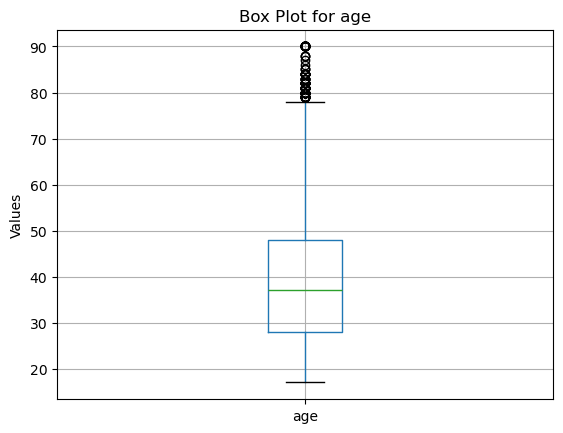

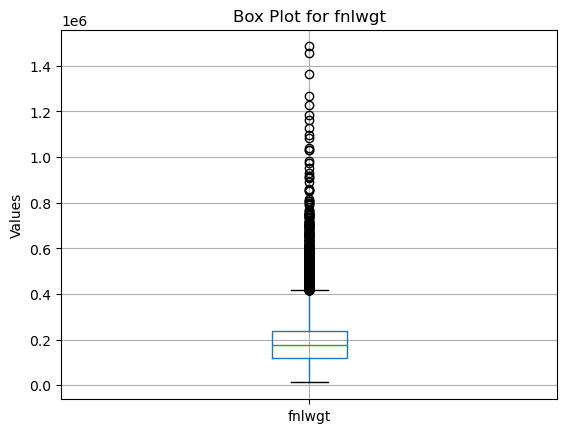

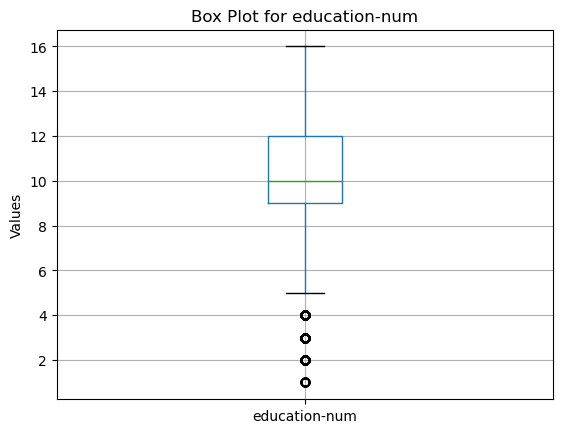

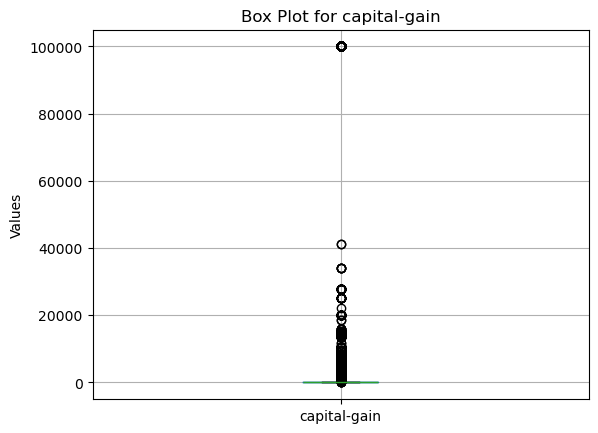

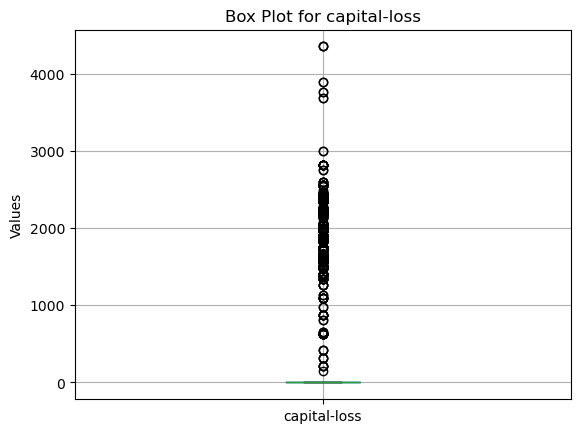

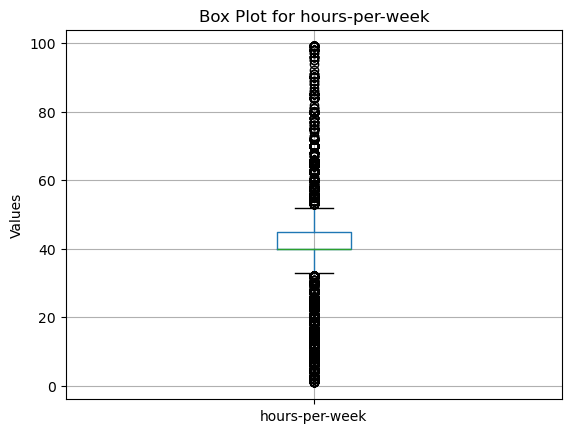

In [61]:
# forloop
# Create box plots for numerical columns using a for loop
for column in numeric_columns.columns:
    plt.figure()  # Create a new figure for each plot
    numeric_columns.boxplot(column=column)
    plt.title(f"Box Plot for {column}")
    plt.ylabel("Values")
    plt.show()

## OUTLINERS REMOVAL

In [64]:
def handle_outliers_iqr(df):
    # Iterate over all numeric columns
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate the IQR, lower and upper bounds
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR  # Lower limit
        upper = Q3 + 1.5 * IQR  # Upper limit

        # Apply capping (Winsorizing) to cap values beyond bounds
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return df


# Apply the function to handle outliers in the dataset
census_df1 = handle_outliers_iqr(census_df)

# Verify the result
print(f"Shape of the DataFrame after handling outliers: {census_df1.shape}")

Shape of the DataFrame after handling outliers: (32537, 15)


In [66]:
census_df1.head

<bound method NDFrame.head of         age         workclass    fnlwgt   education  education-num  \
0      39.0         State-gov   77516.0   Bachelors           13.0   
1      50.0  Self-emp-not-inc   83311.0   Bachelors           13.0   
2      38.0           Private  215646.0     HS-grad            9.0   
3      53.0           Private  234721.0        11th            7.0   
4      28.0           Private  338409.0   Bachelors           13.0   
...     ...               ...       ...         ...            ...   
32556  27.0           Private  257302.0  Assoc-acdm           12.0   
32557  40.0           Private  154374.0     HS-grad            9.0   
32558  58.0           Private  151910.0     HS-grad            9.0   
32559  22.0           Private  201490.0     HS-grad            9.0   
32560  52.0      Self-emp-inc  287927.0     HS-grad            9.0   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-i

In [68]:
# After outliners handling

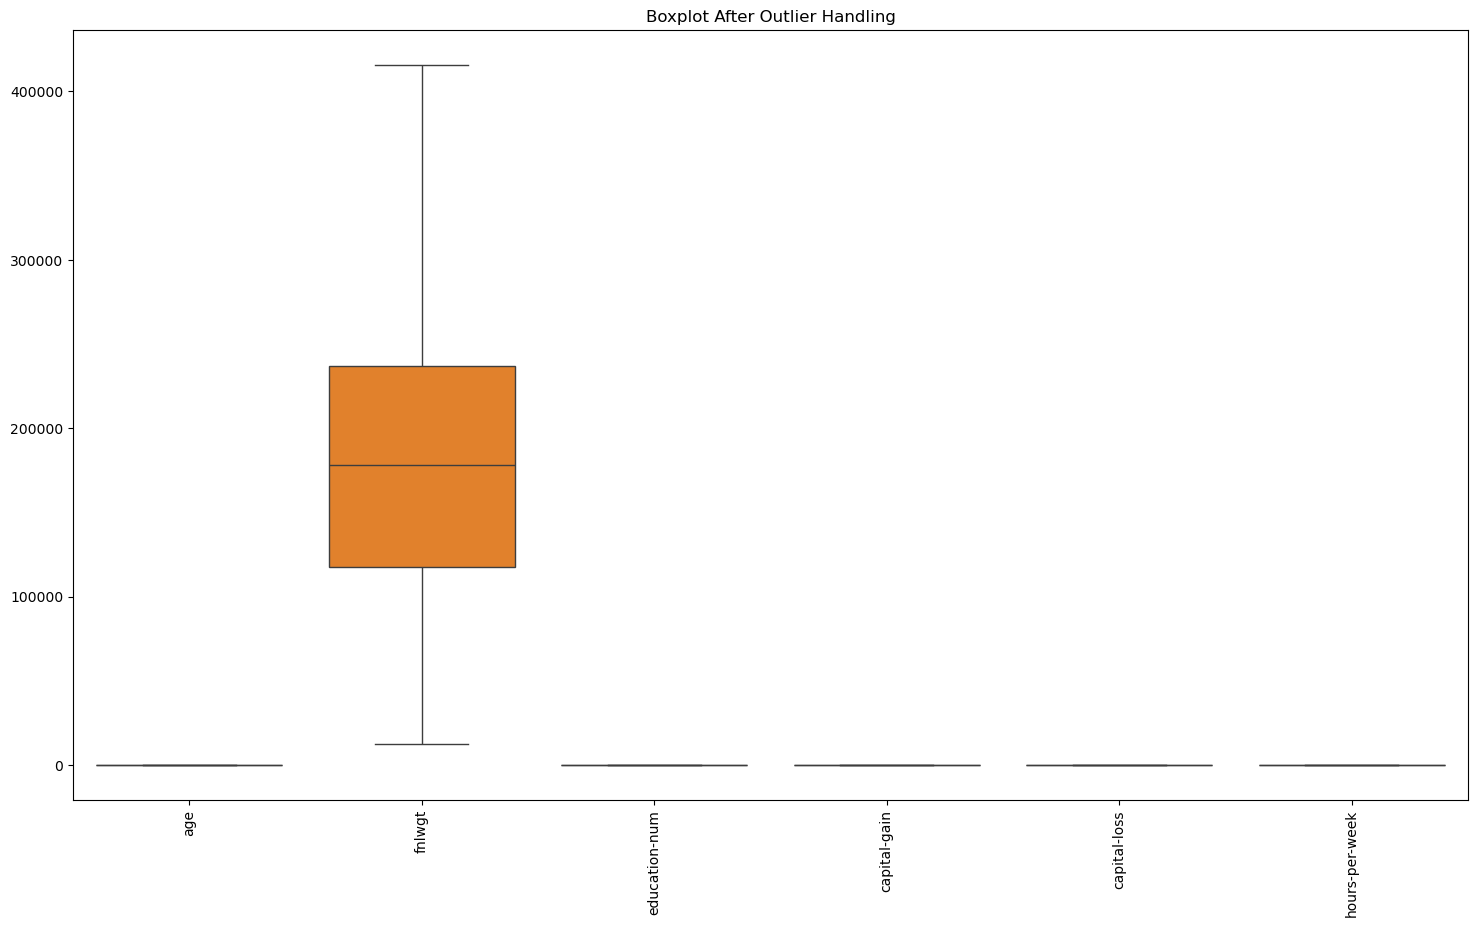

In [70]:
plt.figure(figsize=(18,10))
sns.boxplot(data=census_df1)
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=90)

plt.show()

## HANDLING SKEWNESS

In [73]:
# Check skewness of numerical columns
numerical_features = census_df1.select_dtypes(include=['float64', 'int64']).columns
#numerical_features
print(census_df1[numerical_features].skew())

age               0.513435
fnlwgt            0.548158
education-num    -0.033530
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.438212
dtype: float64


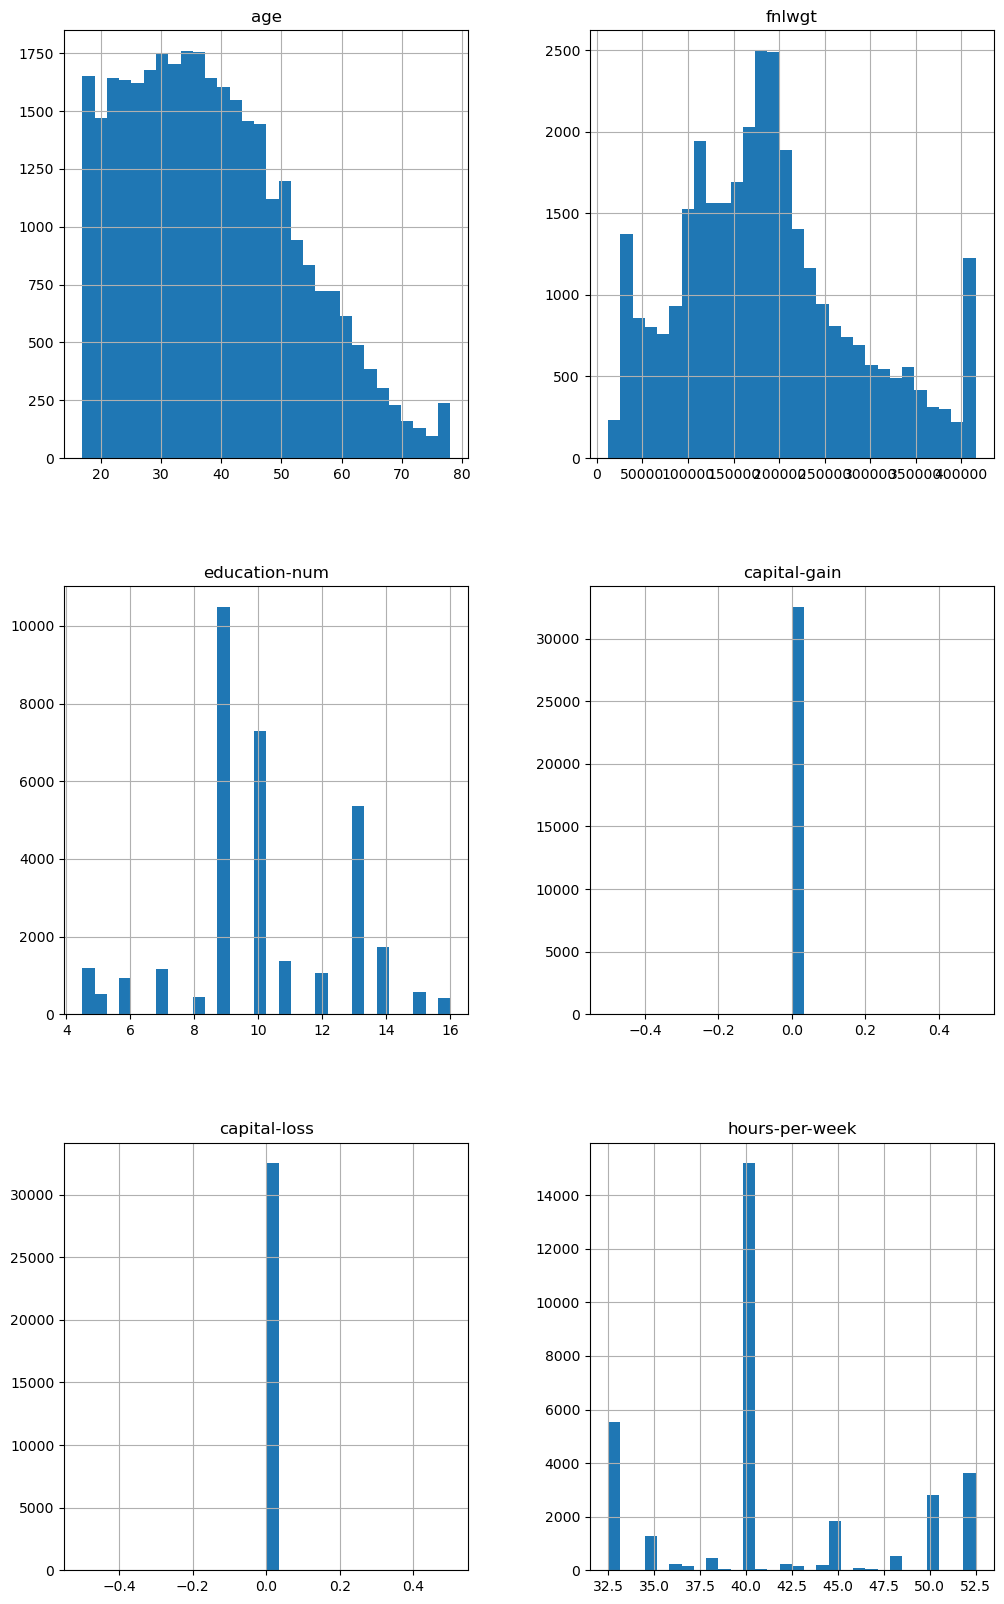

In [75]:
# Plot histograms before transformed features
census_df1.hist(figsize=(12, 20), bins=30)
plt.show()

In [77]:
pt = PowerTransformer(method='yeo-johnson')
census_df1[numerical_features] = pt.fit_transform(census_df1[numerical_features])

print(census_df1[numerical_features].skew())

age              -0.016412
fnlwgt           -0.047458
education-num    -0.001633
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.020163
dtype: float64


<Axes: ylabel='Density'>

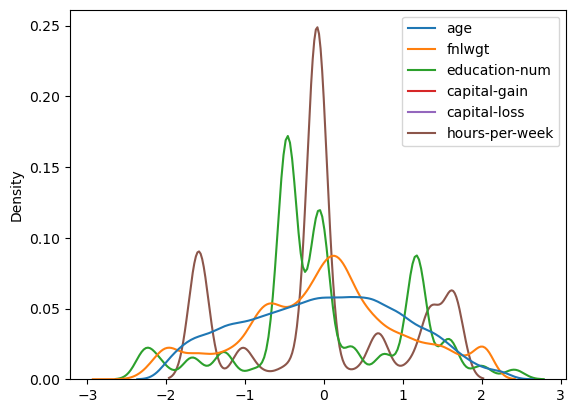

In [79]:
sns.kdeplot(census_df1)

## Exploratory Data Analysis (EDA)

<Figure size 640x480 with 0 Axes>

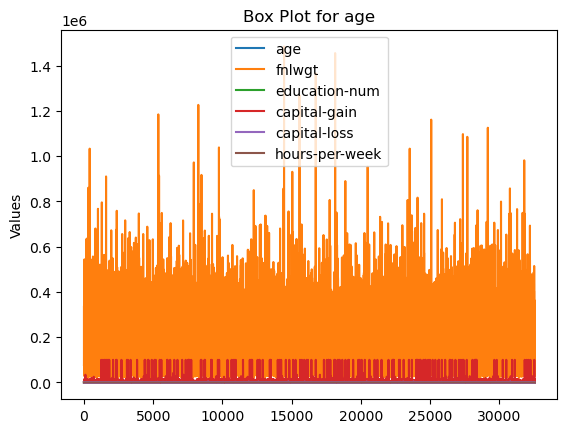

<Figure size 640x480 with 0 Axes>

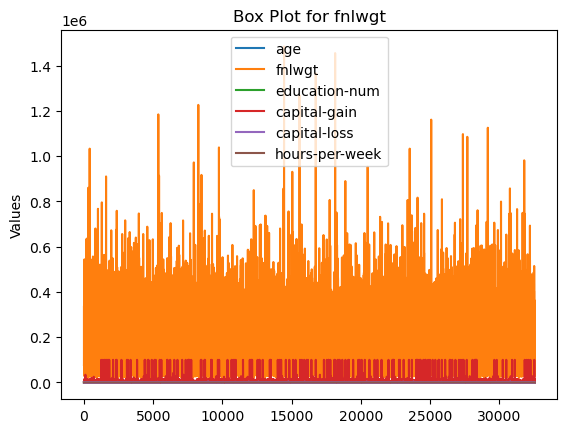

<Figure size 640x480 with 0 Axes>

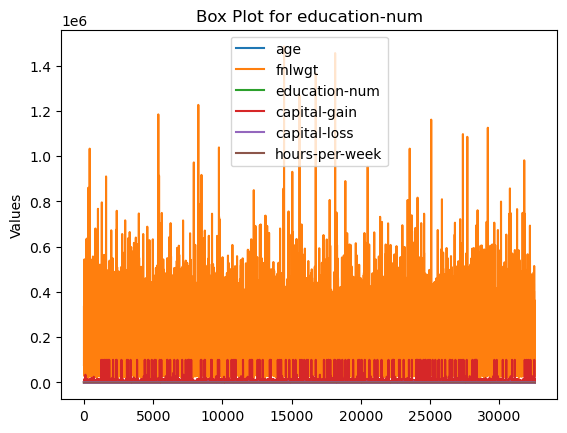

<Figure size 640x480 with 0 Axes>

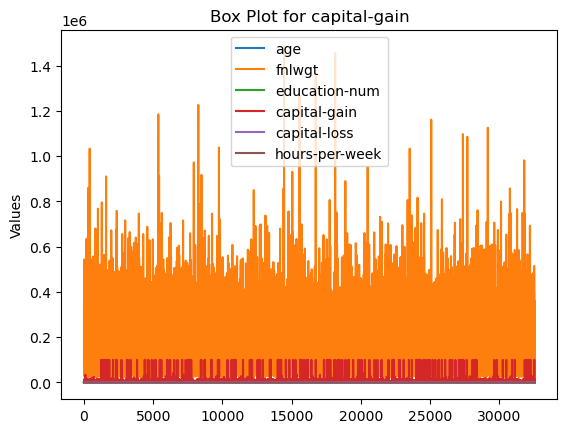

<Figure size 640x480 with 0 Axes>

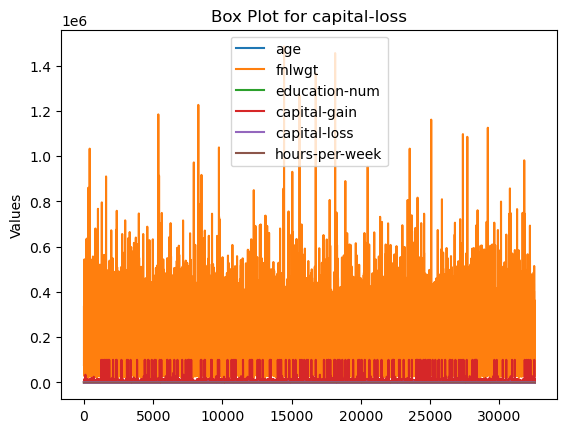

<Figure size 640x480 with 0 Axes>

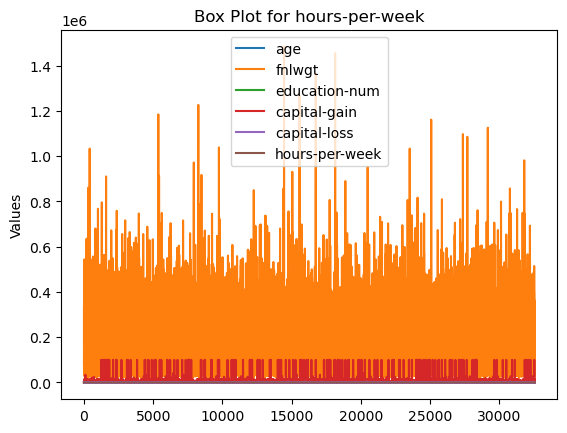

In [82]:
# forloop
# Create box plots for numerical columns using a for loop
for column in numeric_columns.columns:
    plt.figure()  # Create a new figure for each plot
    numeric_columns.plot(column=column)
    plt.title(f"Box Plot for {column}")
    plt.ylabel("Values")
    plt.show()

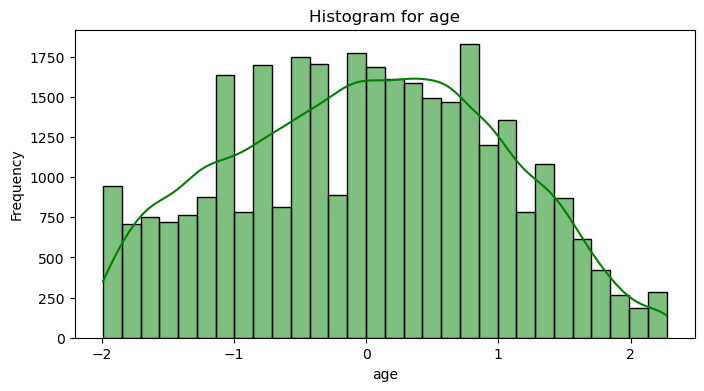

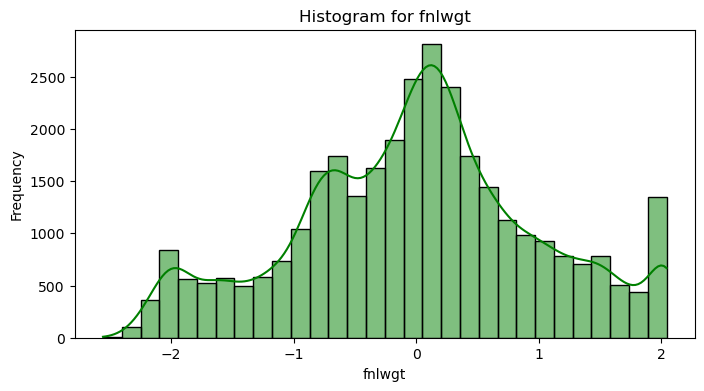

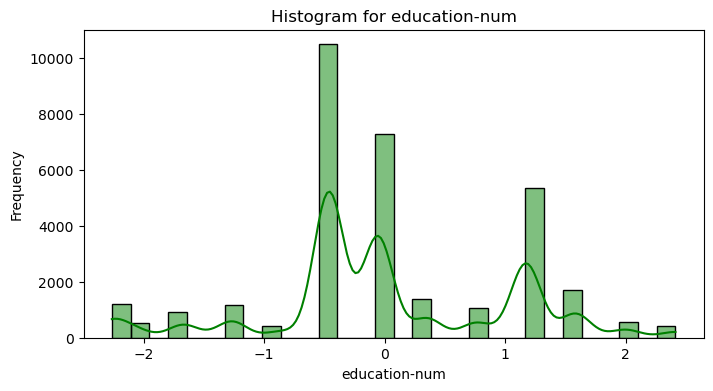

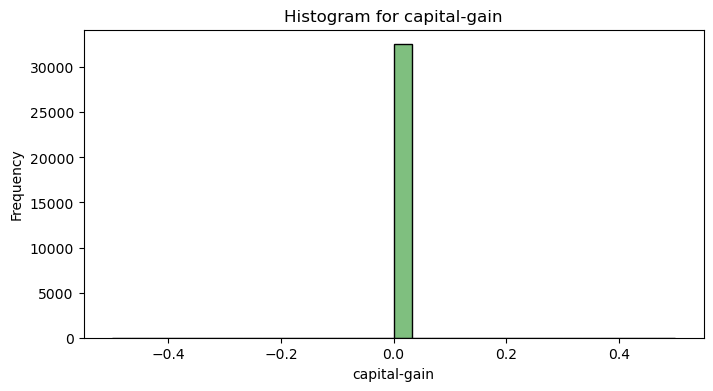

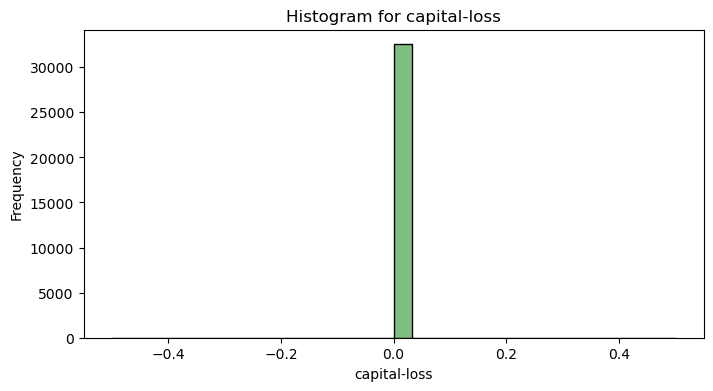

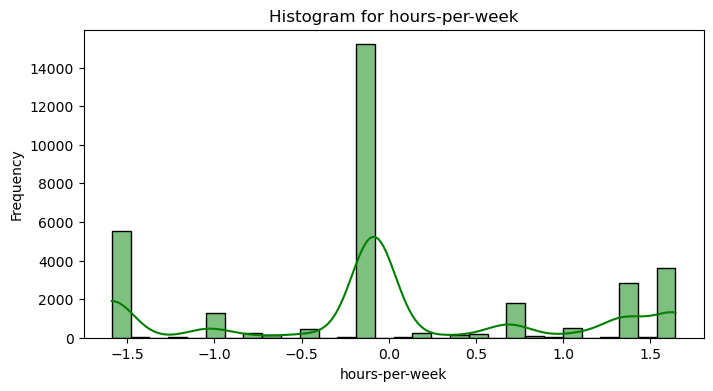

In [84]:
for column in numeric_columns:
    plt.figure(figsize=(8, 4))  # Set figure size
    sns.histplot(data=census_df, x=column, kde=True, bins=30,color='green')  # Histogram with KDE
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

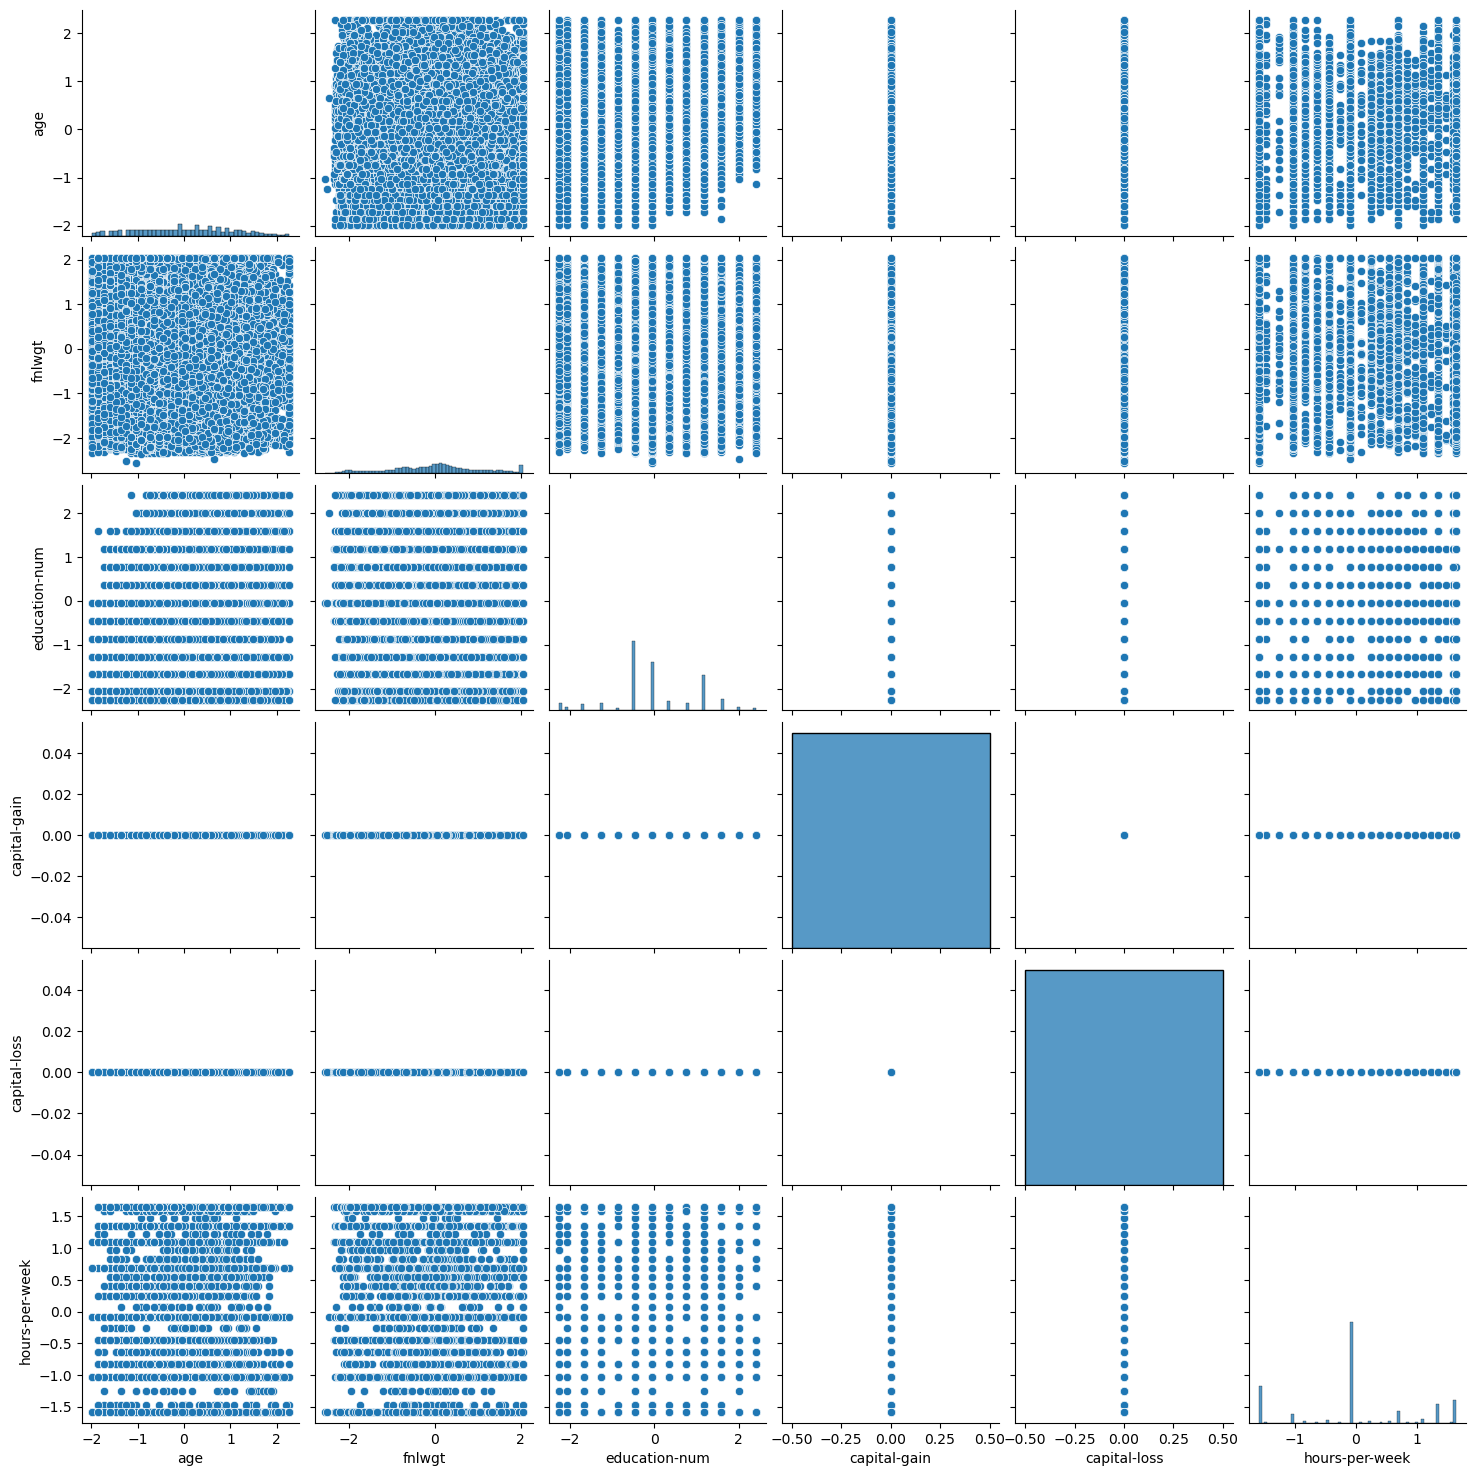

In [86]:

sns.pairplot(census_df1)

In [87]:
categorical_columns = census_df1.select_dtypes(include='object').columns
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

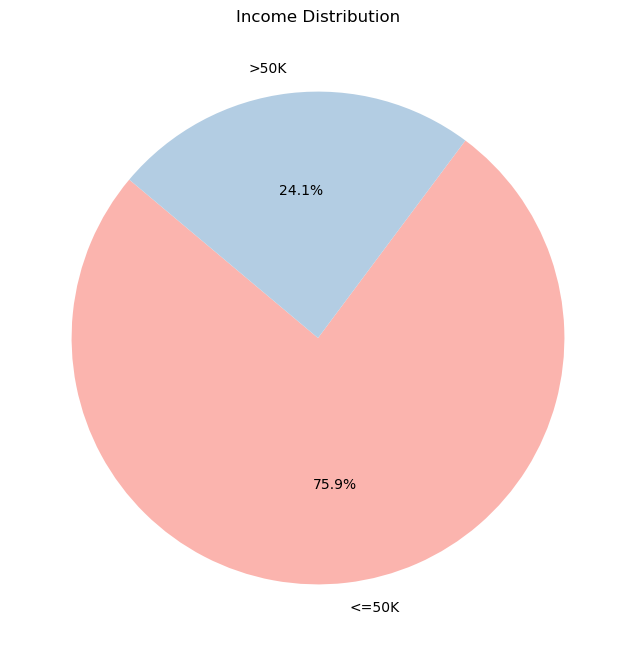

In [96]:
 #Pie Chart for Income Distribution
plt.figure(figsize=(8, 8))
income_counts = census_df1['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors )
plt.title('Income Distribution')
plt.show

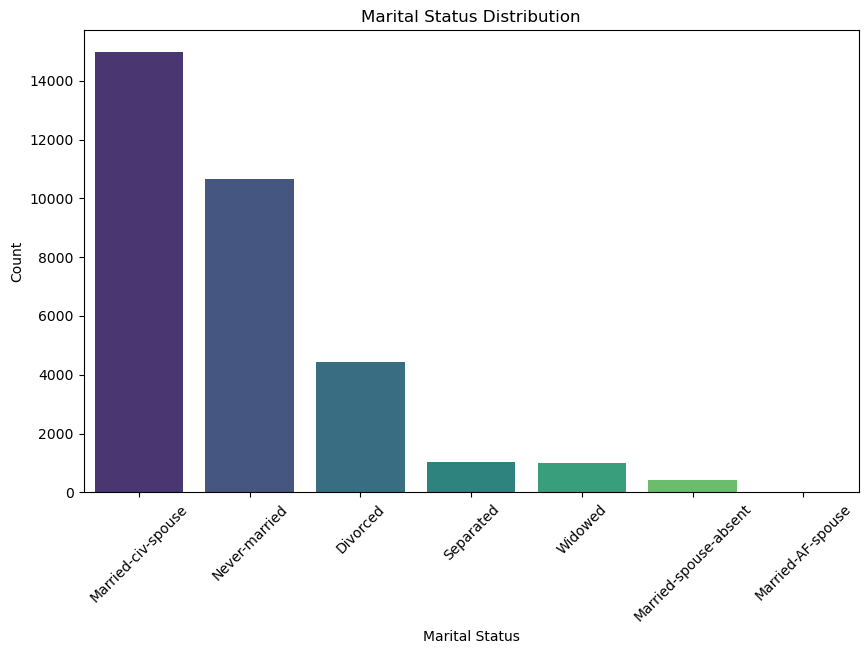

In [98]:
marital_status_counts = census_df1['marital-status'].value_counts()

# Step 2: Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette='viridis')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

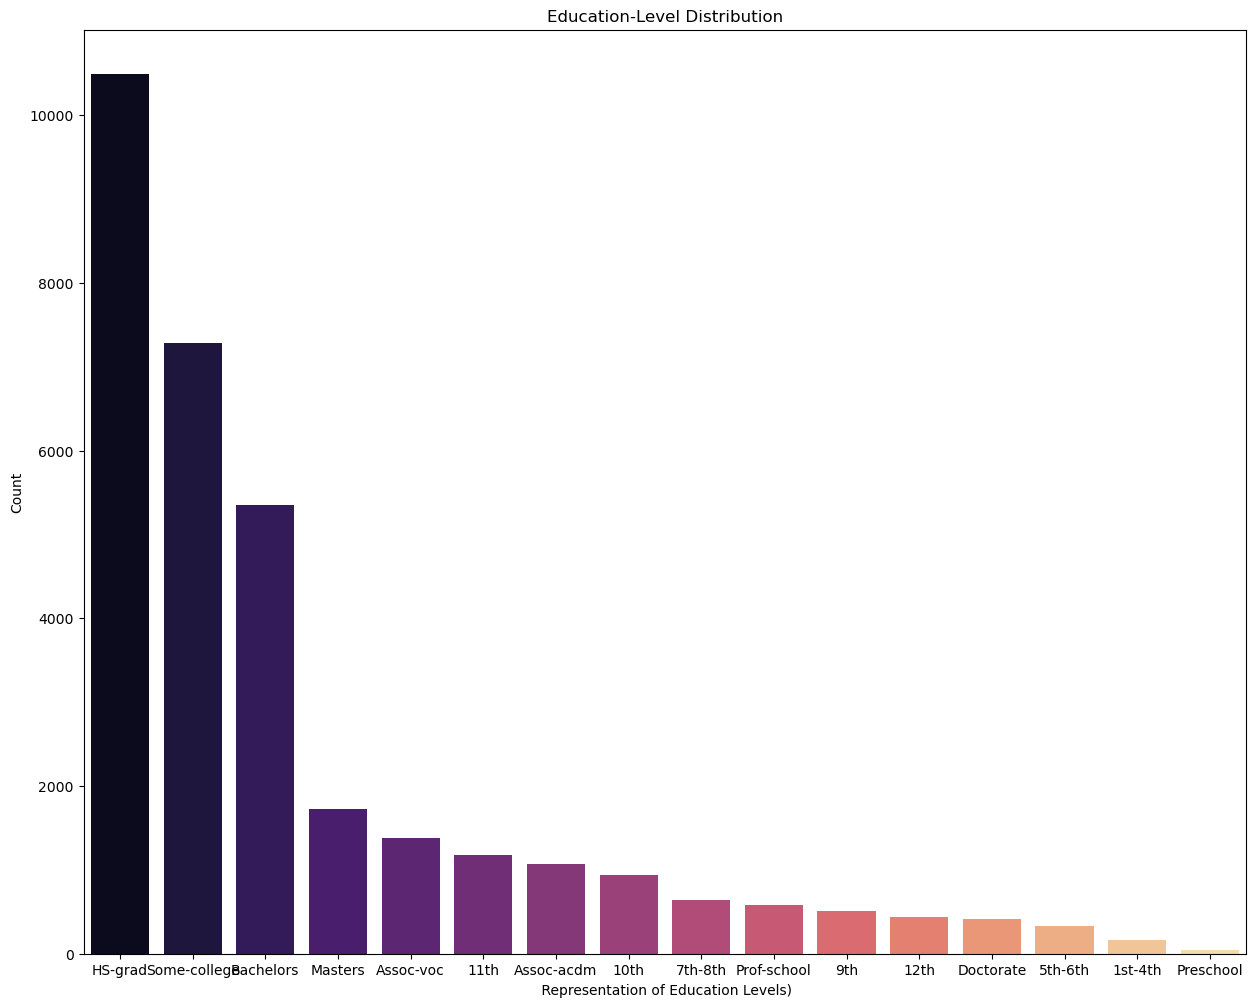

In [100]:
# Step 1: Count Plot for Education-level
plt.figure(figsize=(15, 12))
sns.countplot(data=census_df1, x='education', palette='magma', order=census_df1['education'].value_counts().index)
plt.title('Education-Level Distribution')
plt.xlabel(' Representation of Education Levels)')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='hours-per-week', ylabel='Density'>

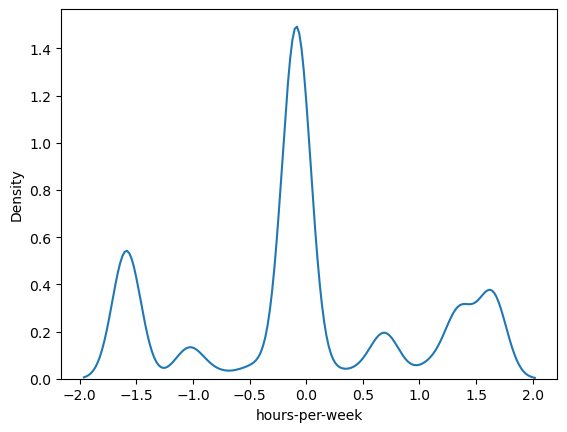

In [102]:
sns.kdeplot(census_df1['hours-per-week'])

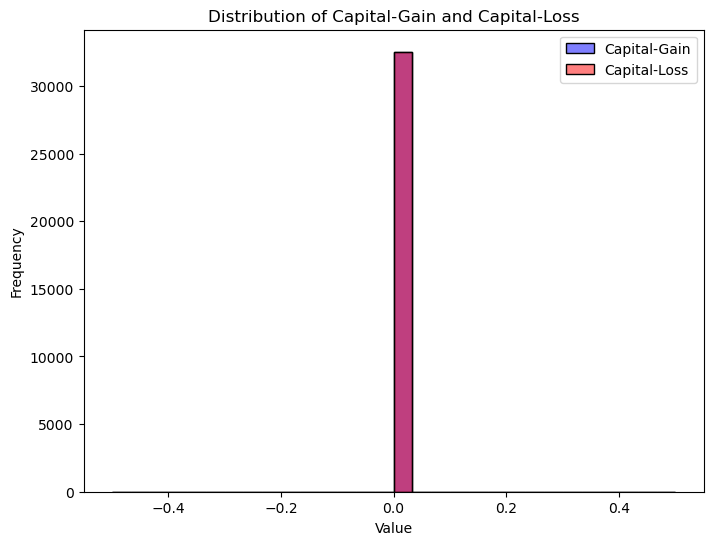

In [108]:
plt.figure(figsize=(8, 6))
sns.histplot(census_df1['capital-gain'], kde=True, color='blue', label='Capital-Gain', bins=30)
sns.histplot(census_df1['capital-loss'], kde=True, color='red', label='Capital-Loss', bins=30)
plt.title('Distribution of Capital-Gain and Capital-Loss')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [110]:
X = census_df1.drop('income', axis=1)
y = census_df1['income']

# Encode the target variable (income)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # <=50K -> 0, >50K -> 1

In [112]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [114]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.173466,State-gov,-1.208199,Bachelors,1.171644,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,-0.086927,United-States
1,0.894370,Self-emp-not-inc,-1.122196,Bachelors,1.171644,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,-1.588007,United-States
2,0.100091,Private,0.404312,HS-grad,-0.462182,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,-0.086927,United-States
3,1.068490,Private,0.583797,11th,-1.268562,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,-0.086927,United-States
4,-0.734740,Private,1.463650,Bachelors,1.171644,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,-0.086927,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.830779,Private,0.788121,Assoc-acdm,0.760914,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,-0.442557,United-States
32557,0.245342,Private,-0.226342,HS-grad,-0.462182,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,-0.086927,United-States
32558,1.341717,Private,-0.253836,HS-grad,-0.462182,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,-0.086927,United-States
32559,-1.358333,Private,0.266526,HS-grad,-0.462182,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,-1.588007,United-States


In [116]:
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [118]:
numeric_col=X.select_dtypes(include=['number']).columns

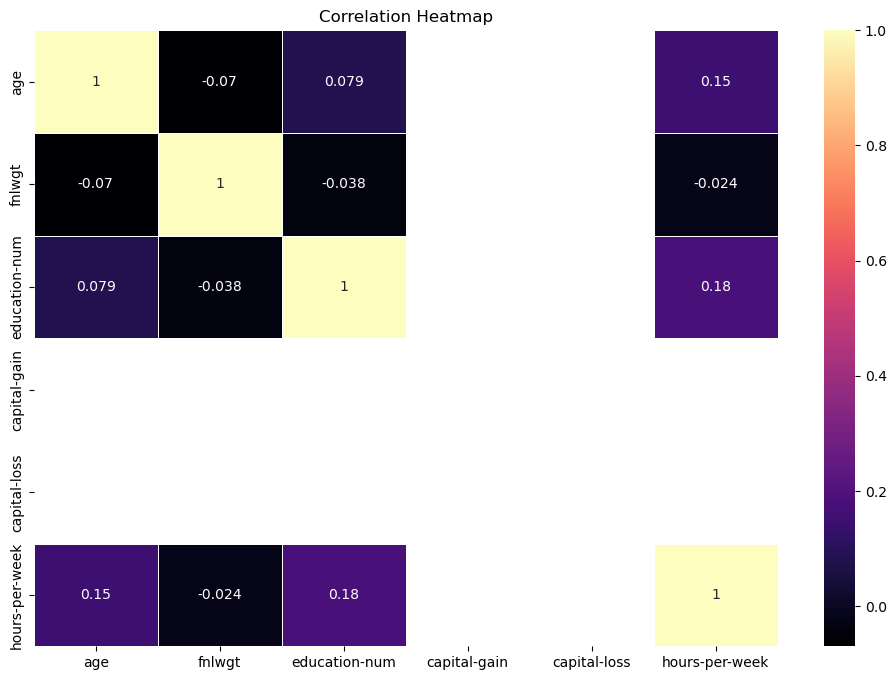

In [120]:
correlation_matrix = X[numeric_col].corr()
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [122]:
categ_columns=X.select_dtypes(include=['object']).columns
print("categorical_columns:",categ_columns)

categorical_columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [124]:
# Perform one-hot encoding
X = pd.get_dummies(X, columns=categ_columns, drop_first=True)

# Verify the result
print("Shape of X after one-hot encoding:", X.shape)
print("First 5 rows of the transformed dataset:\n", X.head())

Shape of X after one-hot encoding: (32537, 97)
First 5 rows of the transformed dataset:
         age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.173466 -1.208199       1.171644           0.0           0.0   
1  0.894370 -1.122196       1.171644           0.0           0.0   
2  0.100091  0.404312      -0.462182           0.0           0.0   
3  1.068490  0.583797      -1.268562           0.0           0.0   
4 -0.734740  1.463650       1.171644           0.0           0.0   

   hours-per-week  workclass_Local-gov  workclass_Never-worked  \
0       -0.086927                False                   False   
1       -1.588007                False                   False   
2       -0.086927                False                   False   
3       -0.086927                False                   False   
4       -0.086927                False                   False   

   workclass_Private  workclass_Self-emp-inc  ...  native-country_Portugal  \
0              False       

In [126]:
# Check data types of all columns
print(X.dtypes)

# Ensure no columns are categorical anymore
if X.select_dtypes(include='object').empty:
    print("All columns are now numeric!")

age                               float64
fnlwgt                            float64
education-num                     float64
capital-gain                      float64
capital-loss                      float64
                                   ...   
native-country_Thailand              bool
native-country_Trinadad&Tobago       bool
native-country_United-States         bool
native-country_Vietnam               bool
native-country_Yugoslavia            bool
Length: 97, dtype: object
All columns are now numeric!


In [128]:
X.isnull().sum()

age                               0
fnlwgt                            0
education-num                     0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 97, dtype: int64

In [130]:
y

array([0, 0, 0, ..., 0, 0, 1])

## FEATURE SELECTION

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# Train Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [138]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                              Feature  Importance
29  marital-status_Married-civ-spouse    0.250880
2                       education-num    0.151631
31       marital-status_Never-married    0.128217
0                                 age    0.082644
36         occupation_Exec-managerial    0.048892
..                                ...         ...
4                        capital-loss    0.000000
3                        capital-gain    0.000000
76             native-country_Ireland    0.000000
70  native-country_Holand-Netherlands    0.000000
84                native-country_Peru    0.000000

[97 rows x 2 columns]


In [140]:
selector = SelectFromModel(rf, threshold=0.01)  # Select features above the mean importance
selector.fit(X_train, y_train)

# Transform data to keep selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'education-num', 'hours-per-week', 'education_Bachelors',
       'education_Doctorate', 'education_Masters', 'education_Prof-school',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Other-service',
       'relationship_Not-in-family', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'sex_Male'],
      dtype='object')


In [142]:
X_train_selected

array([[-0.05143762, -0.4621815 , -0.44255674, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.01135617, -0.4621815 , -0.08692678, ...,  0.        ,
         0.        ,  1.        ],
       [-0.20987833, -0.0561237 , -0.08692678, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.85358724, -1.2685616 , -1.58800704, ...,  0.        ,
         0.        ,  0.        ],
       [-0.20987833,  0.35161954,  1.3516474 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.24573113, -0.0561237 , -1.58800704, ...,  0.        ,
         0.        ,  1.        ]])